## OCNS 2019, Simulating dendrites at different levels of abstraction

## Exercise 2a: Temporal integration and coincidence detection with KA and IH currents

### In this exercise we will see how an A-type potassium current and Ih cation current can be used to constrain the temporal window of AP firing. You will start with the same setup as the previous exercises, with a three-compartment neuron model -- a soma and two dendritic compartments.

### compile ion channel models (.mod files)
#### (Not necessary if you've already compiled them in Exc 1c)

In [1]:
%%bash
nrnivmodl  # Compile NEURON model (for Linux/Mac users)
# For windows users: type "mknrndll" in the start menu and navigate to the folder with the .mod files and press enter.

/Users/wfpodlaski/Dropbox/Code/ocns2019_simulatingdendrites
Traub.mod h.mod ka.mod
Traub.mod h.mod ka.mod
"/Applications/NEURON-7.7/nrn/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/Applications/NEURON-7.7/nrn/include/nrn" -I"/Applications/NEURON-7.7/nrn/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/Applications/NEURON-7.7/nrn/include/nrn -I/Applications/NEURON-7.7/nrn/x86_64/lib -g -O2 -c mod_func.c  -fno-common -DPIC -o .libs/mod_func.o
"/Applications/NEURON-7.7/nrn/share/nrn/libtool" --tag=CC --mode=link gcc -module  -g -O2    -headerpad_max_install_names -o libnrnmech.la -rpath "/Applications/NEURON-7.7/nrn/x86_64/lib"  Traub.lo h.lo ka.lo mod_func.lo  -L"/Applications/NEURON-7.7/nrn/x86_64/lib" -lnrnoc -loc -lmemacs  -lscopmath -lsparse13 -lreadline -lncurses -L"/Applications/NEURON-7.7/nrn/x86_64/lib" -lnrniv -livoc -lneuron_gnu -lmeschach -lsundials       
libtool: link: rm -fr  .libs/libnrn

In [2]:
# -*- coding: utf-8 -*-
from neuron import h, gui
from matplotlib import pyplot as plt
import numpy as np
% matplotlib inline

# Simulation parameters
h.tstop = 100               # ms
h.dt = 0.1                  # ms
h.steps_per_ms = 10         # For plotting-should be compartible with dt
h.v_init = -65              # initial membrane potential
fs = 14                     # font size for plots

### Define the morphology and passive conductances

In [3]:
# Create a soma and two dendrites and connect them.
soma=h.Section(name='soma')
dend0, dend1 = [h.Section(name=n) for n in ['dend0', 'dend1']]

# Define properties of soma
soma.diam = 20   # um
soma.L = 200     # um
soma.Ra = 100    # Axial resistance in Ohm * cm
soma.cm = 1      # specific membrane capacitance, capacitance per unit of membrane, uF/cm^2   
soma.nseg=1

soma.insert('pas')
for seg in soma: 
    seg.pas.e= -65
    seg.pas.g= 0.0001

# Define properties of dend0
dend0.diam = 5
dend0.L = 500
dend0.nseg=11
dend0.cm = 1
dend0.Ra = 100

dend0.insert('pas')      #Insert passive (leak) channels
for seg in dend0:
    seg.pas.e= -65
    seg.pas.g= 0.0001

# Define properties of dend1
dend1.diam = 3
dend1.L = 200
dend1.nseg=13
dend1.cm = 1
dend1.Ra = 100

dend1.insert('pas')      #Insert passive (leak) channels
for seg in dend1:
    seg.pas.e= -65
    seg.pas.g= 0.0001
    
# connect the compartments together
dend0.connect(soma(0),0)        #Connect the 0 point of dendrite 0 to the zero point of the soma
dend1.connect(dend0(1),0)  

dend1

### Insert KA and IH currents
#### (Note: max conductances (ghdbar, gbar) are initially set to zero, so the model remains passive)

In [4]:
soma.insert('hd')
soma.insert('ka')
for seg in soma: 
    seg.hd.ghdbar = 0.0  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.0
    seg.hd.ehd = -30.
    seg.ek = -90.
    
dend0.insert('hd')
dend0.insert('ka')
for seg in dend0: 
    seg.hd.ghdbar = 0.0  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.0
    seg.hd.ehd = -30.
    seg.ek = -90.
    
dend1.insert('hd')
dend1.insert('ka')
for seg in dend1: 
    seg.hd.ghdbar = 0.0  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.0
    seg.hd.ehd = -30.
    seg.ek = -90.

### Define the stimulation protocol - one synapse at the soma and another at the dendrite

In [5]:
#------------------------------------------------------
#========== Synaptic stimulation.
#Place the synapse to the middle (0.5) of the soma, ...
Syn_dend=h.ExpSyn(dend1(0.5))
Syn_dend.e=0                     #Reverse potential of the synapse (mV)
Syn_soma=h.ExpSyn(soma(0.5))
Syn_soma.e=0                     #Reverse potential of the synapse (mV)

#========== ...create an artificial spike (an "event" to be delivered to the synapse)...
ns_dend=h.NetStim(0.5)
ns_dend.start = 45      # Dendritic synapse fires at 45 msec
ns_dend.number = 1 
ns_soma=h.NetStim(0.5)
ns_soma.start = 50      # Somatic synapse fires at 50 msec
ns_soma.number = 1 

#... and connect the event to the synapse.
nc_dend = h.NetCon(ns_dend,Syn_dend, -10, 0, 0.035*5)
nc_soma = h.NetCon(ns_soma,Syn_soma, -10, 0, 0.035*3)

### Example simulation
#### Calculate and print in terminal the depolarization at the soma and at the middle part of the distal dendrite (dend1)

('Somatic depolarization is ', 8.11, ' mV')
('Raw somatic depolarization is ', -56.89, ' mV')
('Distal Dendritic depolarization is', 34.37, 'mV')
('Somatic depolarization is ', 7.35, ' mV')
('Raw somatic depolarization is ', -57.63, ' mV')
('Distal Dendritic depolarization is', 36.54, 'mV')


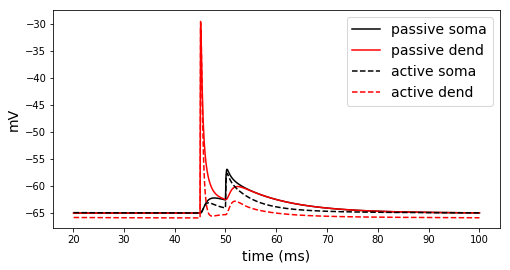

In [6]:
vsoma_vec = h.Vector()        # Membrane potential vector
vdend1_vec = h.Vector()        # Membrane potential vector
t_vec = h.Vector()        # Time stamp vector
vsoma_vec.record(soma(0.5)._ref_v)
vdend1_vec.record(dend1(0.5)._ref_v)
t_vec.record(h._ref_t)

# ------------------------------
# STEP 1: simulate passive model
# ------------------------------

h.run()

print ('Somatic depolarization is ',  round(vsoma_vec.max()-vsoma_vec.min(),2), ' mV')
print ('Raw somatic depolarization is ',  round(vsoma_vec.max(),2), ' mV')
print ('Distal Dendritic depolarization is', round(vdend1_vec.max()-vdend1_vec.min(),2), 'mV')

vsoma_vec.remove(0,200)
vdend1_vec.remove(0,200)
t_vec.remove(0,200)

# Plot results
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec, vsoma_vec, color='black')
plt.plot(t_vec, vdend1_vec, color='red')

# -----------------------------
# STEP 2: simulate active model
# -----------------------------

# now add the currents and change the synaptic weight
nc_dend.weight[0] = 0.039*5
nc_soma.weight[0] = 0.039*3
for seg in soma: 
    seg.hd.ghdbar = 0.00005  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.0005
for seg in dend0: 
    seg.hd.ghdbar = 0.00005  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.005
for seg in dend1: 
    seg.hd.ghdbar = 0.00005  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.05
    
h.run()

vsoma_vec.remove(0,200)
vdend1_vec.remove(0,200)
t_vec.remove(0,200)

# Plot results
plt.plot(t_vec, vsoma_vec, '--', color='black')
plt.plot(t_vec, vdend1_vec, '--', color='red')
plt.xlabel('time (ms)', fontsize=fs)
plt.ylabel('mV', fontsize=fs)
plt.legend(('passive soma', 'passive dend', 'active soma', 'active dend'), fontsize=fs)

print ('Somatic depolarization is ',  round(vsoma_vec.max()-vsoma_vec.min(),2), ' mV')
print ('Raw somatic depolarization is ',  round(vsoma_vec.max(),2), ' mV')
print ('Distal Dendritic depolarization is', round(vdend1_vec.max()-vdend1_vec.min(),2), 'mV')

### Task 1: simulate a passive dendrite over different timing intervals between the dendritic input and somatic input in order to measure the peak somatic depolarization

In [7]:
# set the active conductances to zero
for seg in dend1: 
    seg.hd.ghdbar = 0.0  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.0
for seg in dend0: 
    seg.hd.ghdbar = 0.0  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.0
for seg in soma: 
    seg.hd.ghdbar = 0.0  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.0

nc_dend.weight[0] = 0.035*5
nc_soma.weight[0] = 0.035*3
    
ih_vec = h.Vector()        # Membrane potential vector
ika_vec = h.Vector()        # Membrane potential vector
ika_vec.record(dend0(0.5)._ref_ik)

t_diff = np.linspace(-30,10,81)

# run a for loop over the vector t_diff and measure the depolarization at the soma
# (i.e., round(vsoma_vec.max()-vsoma_vec.min(),2))

# plot the results as a function of t_diff


### Task 2: repeat task 1, but now with KA and IH currents. Plot both together to see the difference.

In [8]:
# Re-add active conductances and change the weights
nc_dend.weight[0] = 0.039*5
nc_soma.weight[0] = 0.039*3

for seg in dend1: 
    seg.hd.ghdbar = 0.00005
    seg.ka.gbar = 0.05
    seg.hd.ehd = -30.
    seg.ek = -90.
for seg in dend0: 
    seg.hd.ghdbar = 0.00005
    seg.ka.gbar = 0.005
    seg.hd.ehd = -30.
    seg.ek = -90.
for seg in soma: 
    seg.hd.ghdbar = 0.00005
    seg.ka.gbar = 0.0005
    seg.hd.ehd = -30.
    seg.ek = -90.
    
# loop over different timings
t_diff = np.linspace(-30,10,81)


### Now, we include sodium and potassium currents at the soma in order to cause an action potential
### Example simulation:

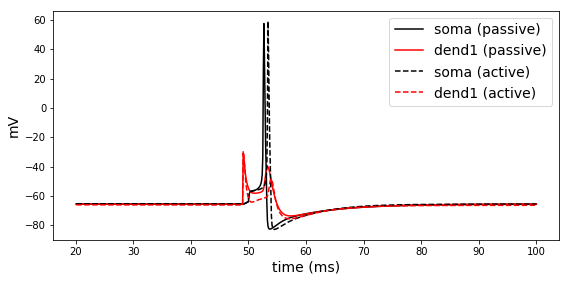

In [9]:
# ----------------------------------------------------------------------------------
# STEP 1: Add HH-like conductances to soma and simulate model with PASSIVE dendrites
# ----------------------------------------------------------------------------------

# Add HH-like conductances to the soma
soma.insert('traub')
for seg in soma: 
    seg.traub.gNabar = 0.1  # Sodium conductance in S/cm2
    seg.traub.gKbar = 0.045  # Potassium conductance in S/cm2
    seg.traub.gLbar = 0.000014    # Leak conductance in S/cm2
    seg.traub.eL = -65.
    seg.traub.eK = -85.  # Reversal potential in mV
    seg.traub.eNa = 90.
    seg.traub.v_shft += 8.5

ns_dend.start = 49      
ns_dend.number = 1 
ns_soma.start = 50 
ns_soma.number = 1 

# Remove active conductances from the dendrites to compare with passive case
nc_dend.weight[0] = 0.035*5
nc_soma.weight[0] = 0.035*3
for seg in dend1: 
    seg.hd.ghdbar = 0.0  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.0
for seg in dend0: 
    seg.hd.ghdbar = 0.0  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.0
for seg in soma:
    seg.hd.ghdbar = 0.0  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.0

h.run()

vsoma_vec.remove(0,200)
vdend1_vec.remove(0,200)
t_vec.remove(0,200)

plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec, vsoma_vec, color='black')
plt.plot(t_vec, vdend1_vec, color='red')

# ----------------------------------------------------------------------------------
# STEP 2: Add back active conductances to the dendrites and repeat
# ----------------------------------------------------------------------------------

nc_dend.weight[0] = 0.039*5
nc_soma.weight[0] = 0.039*3
for seg in dend1: 
    seg.hd.ghdbar = 0.00005  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.05
    seg.hd.ehd = -30.
    seg.ek = -90.
for seg in dend0: 
    seg.hd.ghdbar = 0.00005  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.005
    seg.hd.ehd = -30.
    seg.ek = -90.
for seg in soma:
    seg.hd.ghdbar = 0.00005  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.0005
    seg.hd.ehd = -30.
    seg.ek = -90.

h.run()

vsoma_vec.remove(0,200)
vdend1_vec.remove(0,200)
t_vec.remove(0,200)
plt.plot(t_vec, vsoma_vec, '--', color='black')
plt.plot(t_vec, vdend1_vec, '--', color='red')
plt.legend(('soma (passive)', 'dend1 (passive)', 'soma (active)','dend1 (active)'),fontsize=fs)
plt.xlabel('time (ms)',fontsize=fs)
plt.ylabel('mV',fontsize=fs)
plt.tight_layout()

### Task 3: Reproduce the results from tasks 1 and 2 with AP mechanisms in the soma
#### Step 1: Repeat task 1 (passive dendrite) by looping over t_diff

In [10]:
# set the active conductances to zero
for seg in dend1: 
    seg.hd.ghdbar = 0.0  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.0
for seg in dend0: 
    seg.hd.ghdbar = 0.0  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.0
for seg in soma: 
    seg.hd.ghdbar = 0.0  # Sodium conductance in S/cm2
    seg.ka.gbar = 0.0

nc_dend.weight[0] = 0.035*5
nc_soma.weight[0] = 0.035*3
    
ih_vec = h.Vector()        # Membrane potential vector
ika_vec = h.Vector()        # Membrane potential vector
ika_vec.record(dend0(0.5)._ref_ik)

t_diff = np.linspace(-30,10,81)

# loop here

# plot here


#### Step 2: Repeat task 2 (including KA current) and again loop over t_diff. Plot the results.

In [11]:
nc_dend.weight[0] = 0.039*5
nc_soma.weight[0] = 0.039*3

for seg in dend1: 
    seg.hd.ghdbar = 0.00005
    seg.ka.gbar = 0.05
    seg.hd.ehd = -30.
    seg.ek = -90.
for seg in dend0: 
    seg.hd.ghdbar = 0.00005
    seg.ka.gbar = 0.005
    seg.hd.ehd = -30.
    seg.ek = -90.
for seg in soma: 
    seg.hd.ghdbar = 0.00005
    seg.ka.gbar = 0.0005
    seg.hd.ehd = -30.
    seg.ek = -90.
    
# loop over different timings
t_diff = np.linspace(-30,10,81)

# plot results from previous cell and this one together


### Hint: you should see something like this!
<img src="migliore_shepherd_2002.png" alt="Drawing" style="width: 500px;"/>
#### Migliore & Shepherd 2002